# Reddit Webscraping
# Introduction
## Problem Statement
## Executive Summary
### Content
<br>2. Data Cleaning
<br>3. Preprocessing of text data
<br>4. EDA

# 2. Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier

## 2.1 Manual Inspection of data

In [4]:
thread_1 = 'relationship_advice'
thread_2 = 'BreakUps'

df_t1= pd.read_csv('../data/' + (str(thread_1)) + '.csv')
df_t2 = pd.read_csv('../data/' + (str(thread_2)) + '.csv')

In [3]:
df_t1.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday
0,NaN,relationship_advice,**TL;DR on Throwaways:** If you wish to reques...,t2_4det0,False,NaN,0,False,"[meta] It's not required, but if you make a ne...",[],...,/r/relationship_advice/comments/d3okss/meta_it...,all_ads,True,https://www.reddit.com/r/relationship_advice/c...,3883628,1.568378e+09,7,NaN,False,NaN
1,NaN,relationship_advice,We get the stress from social isolation is bad...,t2_4det0,False,NaN,0,False,[meta] One (1) day bans for moral judgment pos...,[],...,/r/relationship_advice/comments/g7ukh7/meta_on...,all_ads,True,https://www.reddit.com/r/relationship_advice/c...,3883628,1.587826e+09,0,NaN,False,NaN
2,NaN,relationship_advice,opps I made a typo in the title sorry! I meant...,t2_7wa6olo9,False,NaN,0,False,My (27/F) cousin (27/F) confessed that she was...,[],...,/r/relationship_advice/comments/iiscjb/my_27f_...,all_ads,False,https://www.reddit.com/r/relationship_advice/c...,3883628,1.598708e+09,0,NaN,False,NaN
3,NaN,relationship_advice,"I (F, 32) have been married to my husband (M,3...",t2_60t4vdow,False,NaN,0,False,My mom is accusing my husband of abusing our d...,[],...,/r/relationship_advice/comments/iiwkf7/my_mom_...,all_ads,False,https://www.reddit.com/r/relationship_advice/c...,3883628,1.598723e+09,0,NaN,False,NaN
4,NaN,relationship_advice,He said the hard r while reading a message tha...,t2_7q6y01ro,False,NaN,0,False,Broke up with my boyfriend because he’s racist,[],...,/r/relationship_advice/comments/ij4pj2/broke_u...,all_ads,False,https://www.reddit.com/r/relationship_advice/c...,3883628,1.598753e+09,0,NaN,False,NaN


In [4]:
df_t2.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,media_metadata,author_cakeday,poll_data
0,NaN,BreakUps,"Hey, I really miss you. I’m sorry for texting ...",t2_7uvvphr0,False,NaN,0,False,Drunk text! Posting on here instead of actuall...,[],...,False,https://www.reddit.com/r/BreakUps/comments/ij4...,130178,1.598752e+09,0,NaN,False,NaN,NaN,NaN
1,NaN,BreakUps,I no longer have to compromise. I can do exact...,t2_aooid,False,NaN,0,False,Some positives about being single,[],...,False,https://www.reddit.com/r/BreakUps/comments/ij2...,130178,1.598742e+09,1,NaN,False,NaN,NaN,NaN
2,NaN,BreakUps,"Everyday I hear the statement, ""I would do any...",t2_4i38okh,False,NaN,0,False,Why trauma (Breakup) is a good thing,[],...,False,https://www.reddit.com/r/BreakUps/comments/ij5...,130178,1.598754e+09,0,NaN,False,NaN,NaN,NaN
3,NaN,BreakUps,"I can’t touch myself, intimately or otherwise,...",t2_39eluamz,False,NaN,0,False,I can’t take it.,[],...,False,https://www.reddit.com/r/BreakUps/comments/ij3...,130178,1.598747e+09,0,NaN,False,NaN,NaN,NaN
4,NaN,BreakUps,\nDon’t ask them back when they showed you the...,t2_4euwc4gp,False,NaN,0,False,You’re being selfish by holding on to your ex.,[],...,False,https://www.reddit.com/r/BreakUps/comments/ij7...,130178,1.598764e+09,0,NaN,False,NaN,NaN,NaN


In [5]:
print(f'No.of duplciated post in Thread {thread_1}: {df_t1.duplicated().sum()}')
print(f'No.of duplciated post in Thread {thread_2}: {df_t2.duplicated().sum()}')

No.of duplciated post in Thread relationship_advice: 0
No.of duplciated post in Thread BreakUps: 0


In [6]:
print(f'No. of rows in Thread {thread_1}: {df_t1.shape[0]}')
print(f'No. of rows in Thread {thread_2}: {df_t2.shape[0]}')

No. of rows in Thread relationship_advice: 995
No. of rows in Thread BreakUps: 998


In [7]:
df = pd.concat([df_t1,df_t2])[['subreddit', 'selftext']] # combining both dataframe together, using only relevent columns
print(f' Total No. of rows in DataFrame: {df.shape[0]}')
df.subreddit.value_counts()

 Total No. of rows in DataFrame: 1993


BreakUps               998
relationship_advice    995
Name: subreddit, dtype: int64

In [8]:
#setting target variable as binary, 1 for thread 1, 0 for thread 2
df['subreddit'] = df['subreddit'].map({thread_1 : 1, thread_2: 0}) 

#resetting index
df.reset_index(drop=True, inplace = True)
df.subreddit.value_counts()

0    998
1    995
Name: subreddit, dtype: int64

In [9]:
#checking of null values
df.isna().sum()

subreddit     0
selftext     60
dtype: int64

In [10]:
df.dropna(inplace = True)
print(f'Null values left in df: {df.isna().sum().sum()}')
print(f'Number of rows left: {df.shape[0]}')

Null values left in df: 0
Number of rows left: 1933


## 2.2 Creating Bag-Of-Words model
### 2.2.1 Train test split data

In [11]:
#Train test split the data
X_train, X_test, y_train, y_test = train_test_split(df['selftext'],
                                                    df['subreddit'],
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    stratify = df['subreddit'])

In [12]:
print(f'X_train rows: {X_train.shape[0]}, X_test rows: {X_test.shape[0]}')
print(f'y_train rows: {y_train.shape[0]}, y_test rows: {y_test.shape[0]}')

X_train rows: 1546, X_test rows: 387
y_train rows: 1546, y_test rows: 387


In [13]:
X_train.head()

755     Hey guys, I used a throwaway because my bf use...
1208    Got dumped very recently and it's been a very ...
67      So, I've been hospitalized for quite a while a...
1662    My world seems so empty without you. I have wo...
859     For starters... I have struggled with severe d...
Name: selftext, dtype: object

In [14]:
X_train.index[0]

755

In [15]:
X_train[X_train.index[0]] #selecting first index row of train text

'Hey guys, I used a throwaway because my bf uses Reddit too.\nSo, without going into details, I’m just lost at how to deal with this.\nMy boyfriend has stated, that recent and somewhat inconsistent behavior through out our relationship (2+ years) has been a problem for him. We’ve talked about this a lot and he also agreed that I’ve improved a lot, but recently there’s been many things he sees as ‘problems’ in our relationship. I’m trying my best to accommodate to him, because I think he’s right in what he ‘wants’. This sounds like super controlling, but it’s more about “don’t yell, please just tell me you need time to cool down and we talk about this later” stuff. I’m pretty emotional and not always in a good state of mind so I see that I’ve not been treating him properly. I really don’t want to unload my frustration on him, but sometimes I can’t help but snap at him even if he didn’t do anything wrong.\nIn these times I apologise as soon as I realise I’ve crossed a line, but he said h

### 2.2.2 Removing HTML Features

In [16]:
# Removing HTML features if present
example1 = BeautifulSoup(X_train[X_train.index[0]])


print('Before')
print(X_train[X_train.index[0]])
print()
print('AFTER')
print(example1.get_text())

Before
Hey guys, I used a throwaway because my bf uses Reddit too.
So, without going into details, I’m just lost at how to deal with this.
My boyfriend has stated, that recent and somewhat inconsistent behavior through out our relationship (2+ years) has been a problem for him. We’ve talked about this a lot and he also agreed that I’ve improved a lot, but recently there’s been many things he sees as ‘problems’ in our relationship. I’m trying my best to accommodate to him, because I think he’s right in what he ‘wants’. This sounds like super controlling, but it’s more about “don’t yell, please just tell me you need time to cool down and we talk about this later” stuff. I’m pretty emotional and not always in a good state of mind so I see that I’ve not been treating him properly. I really don’t want to unload my frustration on him, but sometimes I can’t help but snap at him even if he didn’t do anything wrong.
In these times I apologise as soon as I realise I’ve crossed a line, but he sai

### 2.2.3 Removing numerical values

In [17]:
letters_only = re.sub('[^a-zA-Z]',
                     " ",
                     example1.get_text())

letters_only[:50]

'Hey guys  I used a throwaway because my bf uses Re'

### 2.2.4 Lowercase text

In [18]:
#lowercase text
lower_case = letters_only.lower()
#splitting text to strings
words = lower_case.split()
words[:10]

['hey', 'guys', 'i', 'used', 'a', 'throwaway', 'because', 'my', 'bf', 'uses']

### 2.2.5 Removing stopwords

In [19]:
words = [w for w in words if w not in stopwords.words('english')]
words[:10]

['hey',
 'guys',
 'used',
 'throwaway',
 'bf',
 'uses',
 'reddit',
 'without',
 'going',
 'details']

### 2.2.6 Lemmatizing text

In [20]:
p_stemmer = PorterStemmer()
words_pstem = [p_stemmer.stem(i) for i in words]

In [21]:
# Print only those lemmatized tokens that are different.
for i in range(len(words)):
    if words[i] != words_pstem[i]:
        print((words[i], words_pstem[i]))

('guys', 'guy')
('used', 'use')
('uses', 'use')
('going', 'go')
('details', 'detail')
('stated', 'state')
('inconsistent', 'inconsist')
('years', 'year')
('talked', 'talk')
('agreed', 'agre')
('improved', 'improv')
('recently', 'recent')
('many', 'mani')
('things', 'thing')
('sees', 'see')
('problems', 'problem')
('trying', 'tri')
('accommodate', 'accommod')
('wants', 'want')
('sounds', 'sound')
('controlling', 'control')
('please', 'pleas')
('pretty', 'pretti')
('emotional', 'emot')
('always', 'alway')
('treating', 'treat')
('properly', 'properli')
('really', 'realli')
('frustration', 'frustrat')
('sometimes', 'sometim')
('anything', 'anyth')
('times', 'time')
('apologise', 'apologis')
('realise', 'realis')
('crossed', 'cross')
('tired', 'tire')
('thinks', 'think')
('breaking', 'break')
('recognizes', 'recogn')
('improved', 'improv')
('working', 'work')
('probably', 'probabl')
('screaming', 'scream')
('defensive', 'defens')
('snappy', 'snappi')
('depressed', 'depress')
('diagnosed', '

# 3. Preprocessing of Text Data

## 3.1 Creating function for preprocessing of text

In [22]:
def words_cleaning(text):
    #removing HTML Features
    bs_text = BeautifulSoup(text).get_text()
    
    #Removing numerical values
    letters_only = re.sub('[^a-zA-Z]', " ", bs_text)

    #Lowercasing text
    lower_case = letters_only.lower() 
    
    #splitting text to strings
    words = lower_case.split()
    
    #removing Stopwords
    lowercase_words = [w for w in words if w not in stopwords.words('english')]
    
    #Lemmatizing text
    p_stemmer = PorterStemmer()
    words_pstem = [p_stemmer.stem(i) for i in lowercase_words]
    
    #join words
    join_words = (" ".join(words_pstem))
    
    #convert type to object
    return(join_words)

### 3.1.1 Preprocessing of text for model

In [23]:
total_text = len(df.selftext)
print(f'There is a total of {total_text} selftext.')

#instantiate empty list to hold cleaned data
clean_train_text = []
clean_test_text = []

There is a total of 1933 selftext.


In [24]:
print("Cleaning and parsing the training set text...")

# Instantiate counter.
j = 0

# For every review in our training set...
for train_text in X_train:
    
    # Convert text to words, then append to clean_train_text.
    clean_train_text.append(words_cleaning(train_text))
    
    # If the index is divisible by 100, print a message.
    if (j + 1) % 100 == 0:
        print(f'selftext {j + 1} of {total_text}.')
    
    j += 1

# Let's do the same for our testing set.
print("Cleaning and parsing the testing set text...")

# For every review in our testing set...
for test_text in X_test:
    
    # Convert review to words, then append to clean_train_reviews.
    clean_test_text.append(words_cleaning(test_text))
    
    # If the index is divisible by 100, print a message.
    if (j + 1) % 100 == 0:
        print(f'selftext {j + 1} of {total_text}.')
        
    j += 1
    
print(f'selftext {total_text} of {total_text}.')    
print('Cleaning complete')

Cleaning and parsing the training set text...
selftext 100 of 1933.
selftext 200 of 1933.
selftext 300 of 1933.
selftext 400 of 1933.
selftext 500 of 1933.
selftext 600 of 1933.
selftext 700 of 1933.
selftext 800 of 1933.
selftext 900 of 1933.
selftext 1000 of 1933.
selftext 1100 of 1933.
selftext 1200 of 1933.
selftext 1300 of 1933.
selftext 1400 of 1933.
selftext 1500 of 1933.
Cleaning and parsing the testing set text...
selftext 1600 of 1933.
selftext 1700 of 1933.
selftext 1800 of 1933.
selftext 1900 of 1933.
Cleaning complete


# 4. Data Exploration

In [25]:
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 5000) 

In [26]:
train_data_features = vectorizer.fit_transform(clean_train_text)

test_data_features = vectorizer.transform(clean_test_text)

In [27]:
print(train_data_features.shape)
print(test_data_features.shape)

(1546, 5000)
(387, 5000)


In [28]:
vocab = vectorizer.get_feature_names()
vocab[:10]

['aa',
 'ab',
 'abandon',
 'abil',
 'abit',
 'abiut',
 'abl',
 'abnorm',
 'aborm',
 'abort']

In [29]:
pd.DataFrame(train_data_features.toarray(), columns = vocab).sum().sort_values(ascending = False)[:10]

want      2667
like      2643
feel      2622
time      2241
know      2155
get       1978
go        1759
friend    1662
would     1662
thing     1589
dtype: int64

# 5. Model

## 5.1 Baseline model

In [30]:
# Instantiate logistic regression model.
lr = LogisticRegression(solver = 'lbfgs', max_iter = 5000)

# Fit model to training data.
lr.fit(train_data_features, y_train)

# Evaluate model on training data.
print(f'R2 score for Train data set: {lr.score(train_data_features, y_train)}')

# Evaluate model on testing data.
print(f'R2 score for Test data set: {lr.score(test_data_features, y_test)}')

R2 score for Train data set: 0.9961190168175937
R2 score for Test data set: 0.8372093023255814


### 5.1 comments 
the train dataset has a much higher accuracy compared to test data, suggesting a overfitting of features

In [31]:
preds = lr.predict(test_data_features)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()


print(f'Specificity: {round(tn / (tn + fp),4)}')
print(f'Sensitivity: {round(tp / (tp + fn),4)}')

Specificity: 0.8617
Sensitivity: 0.8141


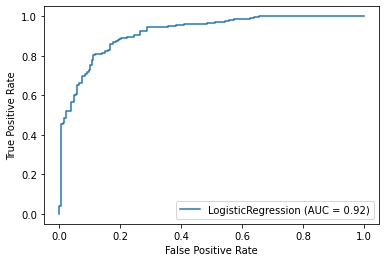

In [32]:
plot_roc_curve(lr, test_data_features, y_test);

## 5.2 Testing with different transformer

### 5.2.1 CountVectorizer Logistic Regression

In [33]:
# Setting pipeline for two stages
cvec_lr = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter = 5000))
])

pipe_params = {
    'cvec__max_features': [2000,3000,4000,5000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.8, .85, .9],
    'cvec__ngram_range': [(1,1), (1,2)]
}

gs_cvec_lr = GridSearchCV(cvec_lr, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

gs_cvec_lr.fit(clean_train_text, y_train);

### 5.2.2 TFIDVectorizer Logistic Regression

In [34]:
# Setting pipeline for two stages
tfid_lr = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter = 5000))
])

pipe_params = {
    'tfid__max_features': [2000,3000,4000,5000],
    'tfid__min_df': [2, 3],
    'tfid__max_df': [.8, .85,.9],
    'tfid__ngram_range': [(1,1), (1,2)]
}

gs_tfid_lr = GridSearchCV(tfid_lr, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

gs_tfid_lr.fit(clean_train_text, y_train);

### 5.2.3 HashingVectorizer Logistic Regression

In [35]:
# Setting pipeline for two stages
hash_lr = Pipeline([
    ('hash', HashingVectorizer()),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter = 5000))
])

pipe_params = {
    'hash__n_features': [2000,3000,4000,5000],
    'hash__ngram_range': [(1,1), (1,2)]
}

gs_hash_lr = GridSearchCV(hash_lr, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

gs_hash_lr.fit(clean_train_text, y_train);

### 5.2.4 ROC AUC Plot (Vectorizer)

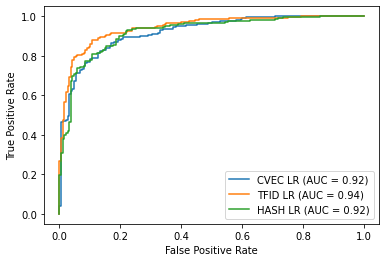

In [36]:
cvec_lr_disp = plot_roc_curve(gs_cvec_lr, clean_test_text, y_test, name = 'CVEC LR')
tfid_lr_disp = plot_roc_curve(gs_tfid_lr, clean_test_text, y_test, name = 'TFID LR', ax = cvec_lr_disp.ax_)
hash_lr_disp = plot_roc_curve(gs_hash_lr, clean_test_text, y_test, name = 'HASH LR', ax = cvec_lr_disp.ax_);

In [60]:
gs_tfid_lr.best_estimator_

Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_df=0.8, max_features=2000, min_df=3)),
                ('lr', LogisticRegression(max_iter=5000))])

optimally, using TFID seems to return better result, will attempt to loop through different models to see which is better

## 5.3 Testing with different models

### 5.3.1 TFIDVectorizer KNeighborsClassifier

In [56]:
# Setting pipeline for two stages
tfid_knn = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

pipe_params = {
    'tfid__max_features': [2000,3000,4000,5000],
    'tfid__min_df': [2, 3],
    'tfid__max_df': [.8, .85,.9],
    'tfid__ngram_range': [(1,1), (1,2)],
    'knn__n_neighbors': [10,15],
    'knn__p': [1,2]
}

gs_tfid_knn = GridSearchCV(tfid_knn, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

gs_tfid_knn.fit(clean_train_text, y_train);

### 5.3.2 TFIDVectorizer MultinomialNB
- MultinomialNB is the best choice here, as the X Variables are all integer counts

In [57]:
# Setting pipeline for two stages
tfid_nb = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

pipe_params = {
    'tfid__max_features': [2000,3000,4000,5000],
    'tfid__min_df': [2, 3],
    'tfid__max_df': [.8, .85,.9],
    'tfid__ngram_range': [(1,1), (1,2)],
    'nb__alpha': list(np.linspace(0.1,1,10))
}

gs_tfid_nb = GridSearchCV(tfid_nb, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

gs_tfid_nb.fit(clean_train_text, y_train);

### 5.3.3 ROC AUC Plot (Model)

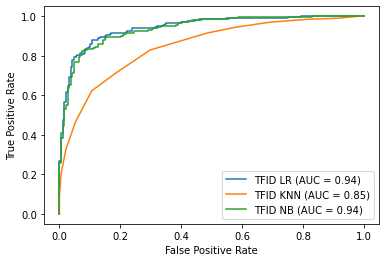

In [67]:
tfid_lr_disp = plot_roc_curve(gs_tfid_lr, clean_test_text, y_test, name = 'TFID LR')
tfid_knn_disp = plot_roc_curve(gs_tfid_knn, clean_test_text, y_test, name = 'TFID KNN', ax = tfid_lr_disp.ax_)
tfid_nb_disp = plot_roc_curve(gs_tfid_nb, clean_test_text, y_test, name = 'TFID NB', ax = tfid_lr_disp.ax_);

#### 5.3.3 comments:
TFIDVectozier with LogisticRegression seems to provide the best AUC score

## 5.4 Confusion Matrix

In [75]:
#check best estimator for best performing model
gs_tfid_lr.best_estimator_

Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_df=0.8, max_features=2000, min_df=3)),
                ('lr', LogisticRegression(max_iter=5000))])

In [42]:
# Using the best model
predictions = gs_tfid_lr.predict(clean_test_text)

In [43]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print(f'Specificity: {round(tn / (tn + fp),4)}')
print(f'Sensitivity: {round(tp / (tp + fn),4)}')

True Negatives: 159
False Positives: 29
False Negatives: 20
True Positives: 179
Specificity: 0.8457
Sensitivity: 0.8995


In [69]:
print(f'Best Model train score: {gs_tfid_lr.best_score_}')
print(f'Best Model test score: {gs_tfid_lr.score(clean_test_text, y_test)}')

Best Model train score: 0.8576970456206284
Best Model test score: 0.8733850129198967


R2 score of model for both train and test data is very close, suggesting the overfitting issue is resolved